In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from ast import literal_eval

plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("../data/kickstarter.csv")
df.head()

,id,goal_usd,country,created_at,deadline,launched_at,state_changed_at,spotlight,staff_pick,main_category,sub_category,blurb,state
0,1560919980,5227.00000,US,2017-02-23 00:28:16,2017-04-10 02:00:36,2017-03-11 03:00:36,2017-04-10 02:00:37,True,False,Food,Community Gardens,The Backyard will be a community garden in Lak...,successful
1,1441173176,47878.24160,GB,2016-07-23 09:59:08,2016-08-22 12:49:55,2016-07-23 12:49:55,2016-08-22 12:49:55,False,False,Film & Video,Drama,Modern London is home to a poverty driven ambi...,failed
2,1907302929,1000.00000,US,2018-02-21 18:13:24,2018-07-30 13:14:04,2018-06-30 13:14:04,2018-07-30 13:14:06,True,False,Games,Playing Cards,Announcing a twist of our original party game ...,successful
3,520777940,1031.74888,HK,2019-08-18 04:39:05,2019-10-04 14:45:30,2019-09-04 14:45:30,2019-10-04 14:45:30,True,False,Games,Playing Cards,Overstock card renovation plan,successful
4,2087823414,550.00000,US,2018-01-06 20:19:17,2018-02-10 02:29:02,2018-01-11 02:29:02,2018-02-10 02:29:04,True,False,Art,Textiles,I want to learn how to dye fabric! Follow me a...,successful


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189162 entries, 0 to 189161
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                189162 non-null  int64  
 1   goal_usd          189162 non-null  float64
 2   country           189162 non-null  object 
 3   created_at        189162 non-null  object 
 4   deadline          189162 non-null  object 
 5   launched_at       189162 non-null  object 
 6   state_changed_at  189162 non-null  object 
 7   spotlight         189162 non-null  bool   
 8   staff_pick        189162 non-null  bool   
 9   main_category     189162 non-null  object 
 10  sub_category      189162 non-null  object 
 11  blurb             189160 non-null  object 
 12  state             189162 non-null  object 
dtypes: bool(2), float64(1), int64(1), object(9)
memory usage: 16.2+ MB


# Target

successful    112056
failed         77106
Name: state, dtype: int64
successful    0.592381
failed        0.407619
Name: state, dtype: float64


/Users/crystalhuang/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


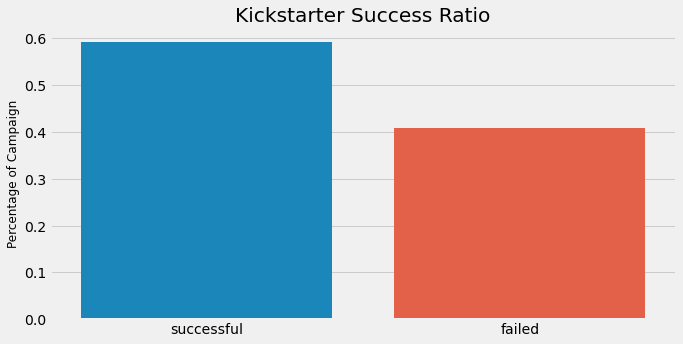

In [4]:
print(df.state.value_counts())
target = df.state.value_counts(normalize=True) 
print(target)
plt.figure(figsize=(10,5))
sns.barplot(target.index, target.values)
plt.title('Kickstarter Success Ratio')
plt.ylabel('Percentage of Campaign', fontsize=12);

In [5]:
df['state'] = df.state.astype(str)
df['success'] = np.where(df.state == "successful", 1, 0)
df.success.value_counts()

1    112056
0     77106
Name: success, dtype: int64

# Features
1. goal usd
2. country (dummies) - FE
3. campaign duration - FE
4. spotlight (dummies) - FE
5. staff pick (dummies) - FE
6. main category (dummies) - FE
7. (sub category (dummies) -FE)
8. blurb length -FE

## 1. Goal in USD

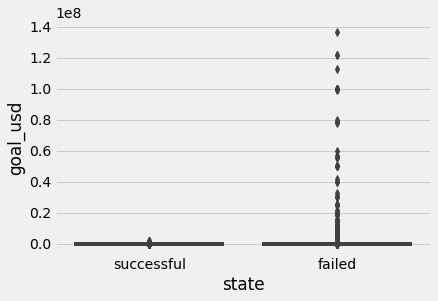

In [6]:
# goal
sns.boxplot(x="state", y="goal_usd", data=df);

## 2. Country

/Users/crystalhuang/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


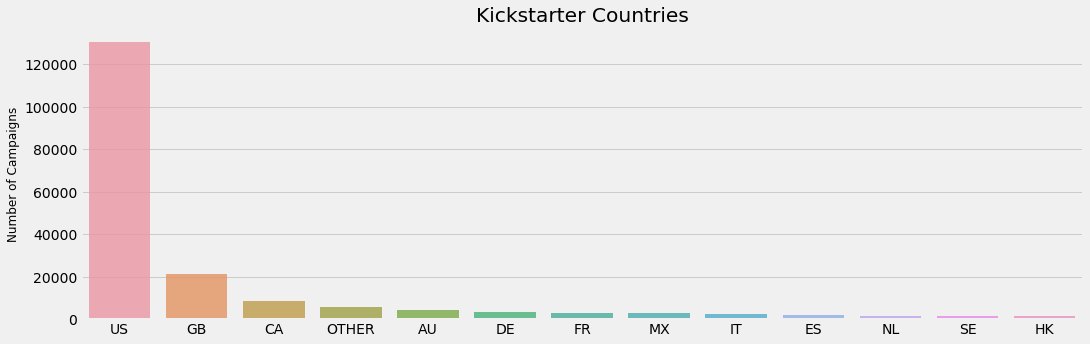

In [7]:
country_list = df.country.value_counts()
plt.figure(figsize=(16,5))
sns.barplot(country_list.index, country_list.values, alpha=0.8)
plt.title('Kickstarter Countries')
plt.ylabel('Number of Campaigns', fontsize=12);

country
AU        2334
CA        5084
DE        1704
ES        1049
FR        1637
GB       13622
HK        1021
IT         877
MX        1174
NL         770
OTHER     3208
SE         752
US       78824
dtype: int64


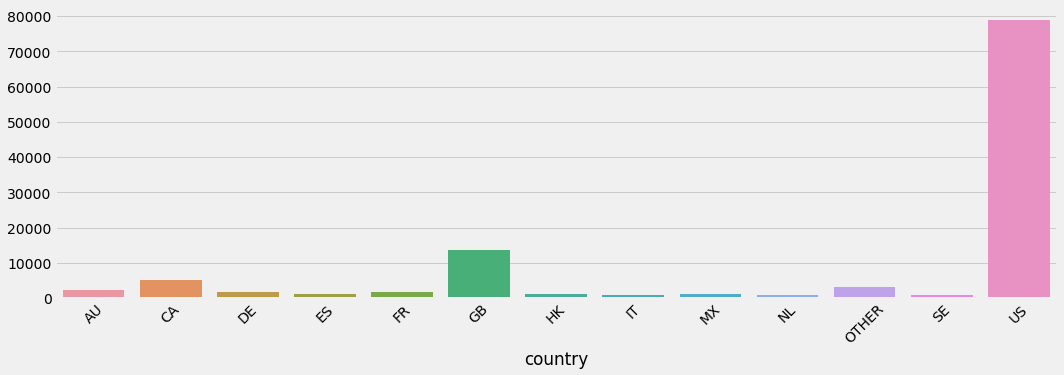

In [8]:
country_success = df[df.success == 1].groupby(['country']).size()
print(country_success)

plt.figure(figsize=(16,5))
sns.barplot(x=country_success.index, y=country_success.values)
plt.xticks(rotation=45);

country
AU        2065
CA        3745
DE        1783
ES        1152
FR        1189
GB        7743
HK         301
IT        1590
MX        1596
NL         878
OTHER     2733
SE         628
US       51703
dtype: int64


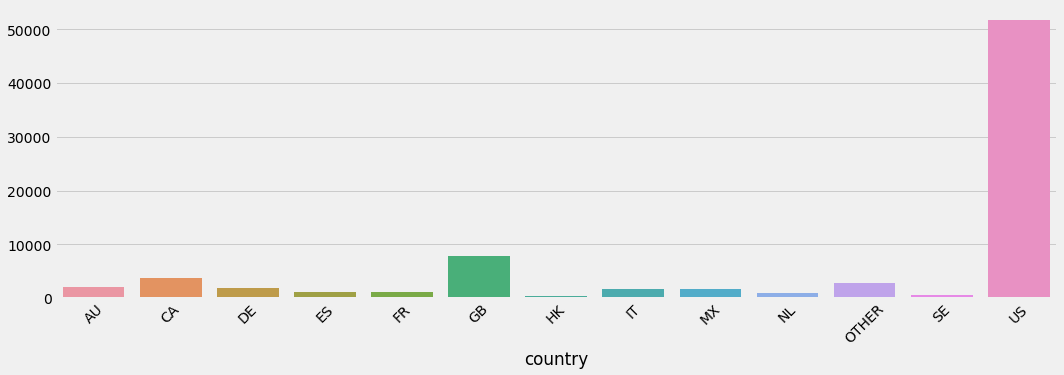

In [9]:
country_fail = df[df.success == 0].groupby(['country']).size()
print(country_fail)

plt.figure(figsize=(16,5))
sns.barplot(x=country_fail.index, y=country_fail.values)
plt.xticks(rotation=45);

In [10]:
country_dict = {'AU': 'OTHER','CA': 'OTHER', 'DE':'OTHER', 'ES': 'OTHER', 'FR': 'OTHER',
 'GB': 'OTHER', 'HK': 'OTHER', 'IT': 'OTHER', 'MX': 'OTHER', 'NL': 'OTHER', 'SE': 'OTHER'}
df = df.replace({"country": country_dict})

country
OTHER    33232
US       78824
dtype: int64


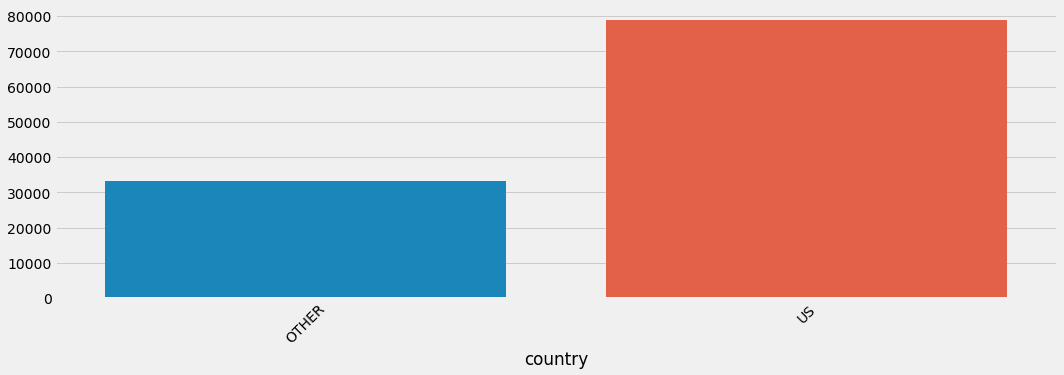

In [11]:
country_success = df[df.success == 1].groupby(['country']).size()
print(country_success)

plt.figure(figsize=(16,5))
sns.barplot(x=country_success.index, y=country_success.values)
plt.xticks(rotation=45);

In [12]:
# Make dummies
df = pd.get_dummies(columns=['country'], drop_first=True, data=df)
df.columns

Index(['id', 'goal_usd', 'created_at', 'deadline', 'launched_at',
       'state_changed_at', 'spotlight', 'staff_pick', 'main_category',
       'sub_category', 'blurb', 'state', 'success', 'country_US'],
      dtype='object')

## 3. Campaign Duration, Prep Duration

In [13]:
df['created_at'] = pd.to_datetime(df.created_at)
df['launched_at'] = pd.to_datetime(df.launched_at)
df['deadline'] = pd.to_datetime(df.deadline)

prep_date = df.created_at.values
start_date = df.launched_at.values
end_date = df.deadline.values

# campaign duration = from launched time to deadline
df['cam_duration'] = pd.to_timedelta(end_date - start_date).days
df['prep_duration'] = pd.to_timedelta(start_date - prep_date).days

In [14]:
#sanity check
df[['created_at', 'launched_at', 'deadline', 'state_changed_at', 'cam_duration', 'prep_duration']].head()

,created_at,launched_at,deadline,state_changed_at,cam_duration,prep_duration
0,2017-02-23 00:28:16,2017-03-11 03:00:36,2017-04-10 02:00:36,2017-04-10 02:00:37,29,16
1,2016-07-23 09:59:08,2016-07-23 12:49:55,2016-08-22 12:49:55,2016-08-22 12:49:55,30,0
2,2018-02-21 18:13:24,2018-06-30 13:14:04,2018-07-30 13:14:04,2018-07-30 13:14:06,30,128
3,2019-08-18 04:39:05,2019-09-04 14:45:30,2019-10-04 14:45:30,2019-10-04 14:45:30,30,17
4,2018-01-06 20:19:17,2018-01-11 02:29:02,2018-02-10 02:29:02,2018-02-10 02:29:04,30,4


## 4. Spotlight &  5. Staff pick

In [15]:
# spotlight and staff_pick
df = pd.get_dummies(columns = ['spotlight','staff_pick'], drop_first=True, data=df)
df.head(5)

,id,goal_usd,created_at,deadline,launched_at,state_changed_at,main_category,sub_category,blurb,state,success,country_US,cam_duration,prep_duration,spotlight_True,staff_pick_True
0,1560919980,5227.00000,2017-02-23 00:28:16,2017-04-10 02:00:36,2017-03-11 03:00:36,2017-04-10 02:00:37,Food,Community Gardens,The Backyard will be a community garden in Lak...,successful,1,1,29,16,1,0
1,1441173176,47878.24160,2016-07-23 09:59:08,2016-08-22 12:49:55,2016-07-23 12:49:55,2016-08-22 12:49:55,Film & Video,Drama,Modern London is home to a poverty driven ambi...,failed,0,0,30,0,0,0
2,1907302929,1000.00000,2018-02-21 18:13:24,2018-07-30 13:14:04,2018-06-30 13:14:04,2018-07-30 13:14:06,Games,Playing Cards,Announcing a twist of our original party game ...,successful,1,1,30,128,1,0
3,520777940,1031.74888,2019-08-18 04:39:05,2019-10-04 14:45:30,2019-09-04 14:45:30,2019-10-04 14:45:30,Games,Playing Cards,Overstock card renovation plan,successful,1,0,30,17,1,0
4,2087823414,550.00000,2018-01-06 20:19:17,2018-02-10 02:29:02,2018-01-11 02:29:02,2018-02-10 02:29:04,Art,Textiles,I want to learn how to dye fabric! Follow me a...,successful,1,1,30,4,1,0


## 6. Main Category

main_category
Art             12511
Comics           6667
Crafts           2608
Dance            2403
Design           4552
Fashion          6580
Film & Video    15501
Food             4788
Games            9301
Journalism       1360
Music           17903
Photography      2654
Publishing      13611
Technology       8203
Theater          3414
dtype: int64


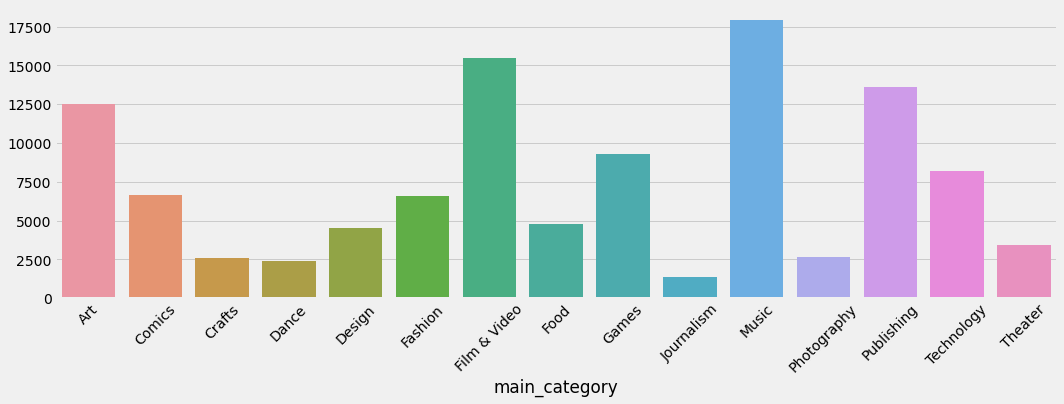

In [16]:
# main category + success
category_success = df[df.success == 1].groupby(['main_category']).size()
print(category_success)
plt.figure(figsize=(16,5))
sns.barplot(x=category_success.index, y=category_success.values)
plt.xticks(rotation=45);

In [17]:
# Make category dummies
df = pd.get_dummies(columns=['main_category'], drop_first=True, data=df)
df.columns

Index(['id', 'goal_usd', 'created_at', 'deadline', 'launched_at',
       'state_changed_at', 'sub_category', 'blurb', 'state', 'success',
       'country_US', 'cam_duration', 'prep_duration', 'spotlight_True',
       'staff_pick_True', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater'],
      dtype='object')

## 7. Sub category

In [18]:
df.sub_category.value_counts()

Web               3805
Tabletop Games    3275
Comedy            2925
Comic Books       2602
Product Design    2600
                  ... 
Quilts              87
Residencies         85
Letterpress         84
Chiptune            50
Taxidermy           10
Name: sub_category, Length: 161, dtype: int64

Too many sub_categories for dummies. Might make the model overfit.

## 8. Length of blurb (description of the campaign)

In [19]:
df.blurb.head(5)

0    The Backyard will be a community garden in Lak...
1    Modern London is home to a poverty driven ambi...
2    Announcing a twist of our original party game ...
3                       Overstock card renovation plan
4    I want to learn how to dye fabric! Follow me a...
Name: blurb, dtype: object

In [20]:
blurb = df.blurb.astype('str')
desc_length = []

for b in blurb:
    desc_length_item = len(b.split(' '))
    desc_length.append(desc_length_item)

df['desc_length'] = desc_length

In [21]:
df.sample(5)

,id,goal_usd,created_at,deadline,launched_at,state_changed_at,sub_category,blurb,state,success,...,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater,desc_length
87886,1062825209,3000.000000,2016-11-26 20:49:30,2017-01-08 10:49:42,2016-12-09 10:49:42,2017-01-08 10:49:42,Interactive Design,A comfortable and affordable EDC spinner toy C...,successful,1,...,0,0,0,0,0,0,0,0,0,21
30582,1027909300,7500.000000,2016-06-15 14:58:21,2016-11-17 16:19:03,2016-10-18 15:19:03,2016-11-17 16:19:03,Woodworking,Show off your individuality with a custom magn...,successful,1,...,0,0,0,0,0,0,0,0,0,20
179570,815403127,79357.133700,2015-06-18 09:49:04,2015-07-22 17:28:23,2015-06-22 17:28:23,2015-07-22 17:28:23,Public Art,"Eveil artistique 'à 4 roues' pour enfants, per...",failed,0,...,0,0,0,0,0,0,0,0,0,12
62364,807396059,2046.119535,2020-01-28 17:32:14,2020-03-06 22:00:00,2020-02-12 12:21:41,2020-03-06 22:00:00,Shorts,A short graduation film about a child as a mod...,successful,1,...,1,0,0,0,0,0,0,0,0,23
43670,1963840598,7642.089825,2017-03-10 02:15:14,2017-07-22 13:59:00,2017-06-22 12:32:08,2017-07-22 13:59:00,Children's Books,Jerome's Gift is a beautifully illustrated med...,successful,1,...,0,0,0,0,0,0,1,0,0,19


In [22]:
df.columns

Index(['id', 'goal_usd', 'created_at', 'deadline', 'launched_at',
       'state_changed_at', 'sub_category', 'blurb', 'state', 'success',
       'country_US', 'cam_duration', 'prep_duration', 'spotlight_True',
       'staff_pick_True', 'main_category_Comics', 'main_category_Crafts',
       'main_category_Dance', 'main_category_Design', 'main_category_Fashion',
       'main_category_Film & Video', 'main_category_Food',
       'main_category_Games', 'main_category_Journalism',
       'main_category_Music', 'main_category_Photography',
       'main_category_Publishing', 'main_category_Technology',
       'main_category_Theater', 'desc_length'],
      dtype='object')

In [23]:
kickstarter = df[['success', 'goal_usd', 'country_US', 'cam_duration', 'prep_duration',
                  'desc_length', 'staff_pick_True', 'main_category_Comics', 
                  'main_category_Crafts', 'main_category_Dance', 'main_category_Design',
                  'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food',
                  'main_category_Games', 'main_category_Journalism','main_category_Music', 
                  'main_category_Photography', 'main_category_Publishing', 
                  'main_category_Technology', 'main_category_Theater']]
kickstarter.head()

,success,goal_usd,country_US,cam_duration,prep_duration,desc_length,staff_pick_True,main_category_Comics,main_category_Crafts,main_category_Dance,...,main_category_Fashion,main_category_Film & Video,main_category_Food,main_category_Games,main_category_Journalism,main_category_Music,main_category_Photography,main_category_Publishing,main_category_Technology,main_category_Theater
0,1,5227.00000,1,29,16,21,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,47878.24160,0,30,0,22,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1000.00000,1,30,128,26,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1031.74888,0,30,17,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,550.00000,1,30,4,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
kickstarter.shape

(189162, 21)

In [26]:
kickstarter.to_csv('../data/model_ready.csv', index=False)